In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from quantum_tools.examples import symbolic_contexts
from quantum_tools.symmetries.workspace import get_contraction_elements
from quantum_tools.config import *
from quantum_tools.visualization.sparse_vis import plot_matrix
from scipy import sparse
import numpy as np
from scipy import io
import os
from functools import reduce
from operator import mul
from quantum_tools.hypergraph.hypergraph_transversals import find_transversals, hyper_graph, hyper_graph_contraction, HTStrat

In [3]:
symbolic_contexts.ABC_444_444.preinjectable_sets
# symbolic_contexts.ABC_444_444.outcomes

[[['A1', 'B1', 'C1'], ['A4', 'B4', 'C4']],
 [['A1', 'B2', 'C3'], ['A4', 'B3', 'C2']],
 [['A2', 'B3', 'C1'], ['A3', 'B2', 'C4']],
 [['A2', 'B4', 'C3'], ['A3', 'B1', 'C2']],
 [['A1'], ['B3'], ['C4']],
 [['A1'], ['B4'], ['C2']],
 [['A2'], ['B1'], ['C4']],
 [['A2'], ['B2'], ['C2']],
 [['A3'], ['B3'], ['C3']],
 [['A3'], ['B4'], ['C1']],
 [['A4'], ['B1'], ['C3']],
 [['A4'], ['B2'], ['C1']]]

In [4]:
small_row_sum, small_A, small_col_sum, small_contracted_A = get_contraction_elements(symbolic_contexts.ABC_222_222)

40 64
ShiftedBase(shift=0, base=(32, 16, 8, 4, 2, 1))
ShiftedBase(shift=0, base=(0, 4, 0, 2, 0, 1))
ShiftedBase(shift=8, base=(0, 4, 0, 2, 1, 0))
ShiftedBase(shift=16, base=(4, 0, 0, 2, 0, 1))
ShiftedBase(shift=24, base=(0, 4, 2, 0, 0, 1))
ShiftedBase(shift=32, base=(4, 0, 2, 0, 1, 0))
Found 14 row_orbits.
Found 20 col_orbits.


In [ ]:
row_sum, A, col_sum, contracted_A = get_contraction_elements(symbolic_contexts.ABC_444_444)

16896 16777216
ShiftedBase(shift=0, base=(4194304, 1048576, 262144, 65536, 16384, 4096, 1024, 256, 64, 16, 4, 1))
ShiftedBase(shift=0, base=(1024, 0, 0, 256, 64, 0, 0, 16, 4, 0, 0, 1))
ShiftedBase(shift=4096, base=(1024, 0, 0, 256, 0, 64, 16, 0, 0, 4, 1, 0))
ShiftedBase(shift=8192, base=(0, 1024, 256, 0, 0, 64, 16, 0, 4, 0, 0, 1))
ShiftedBase(shift=12288, base=(0, 1024, 256, 0, 64, 0, 0, 16, 0, 4, 1, 0))
ShiftedBase(shift=16384, base=(16, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1))
ShiftedBase(shift=16448, base=(16, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0))
ShiftedBase(shift=16512, base=(0, 16, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1))
ShiftedBase(shift=16576, base=(0, 16, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0))
ShiftedBase(shift=16640, base=(0, 0, 16, 0, 0, 0, 4, 0, 0, 0, 1, 0))
ShiftedBase(shift=16704, base=(0, 0, 16, 0, 0, 0, 0, 4, 1, 0, 0, 0))
ShiftedBase(shift=16768, base=(0, 0, 0, 16, 4, 0, 0, 0, 0, 0, 1, 0))
ShiftedBase(shift=16832, base=(0, 0, 0, 16, 0, 4, 0, 0, 1, 0, 0, 0))
Found 450 row_orbits.
Found 358120 col_o

In [12]:
contracted_A

<450x358120 sparse matrix of type '<class 'numpy.int32'>'
	with 3566922 stored elements in Compressed Sparse Row format>

In [17]:
contracted_A_hg = hyper_graph(contracted_A, 0)
fts = find_transversals(contracted_A_hg, strat=HTStrat('depth', max_t=10))

<IPython.core.display.Javascript object>


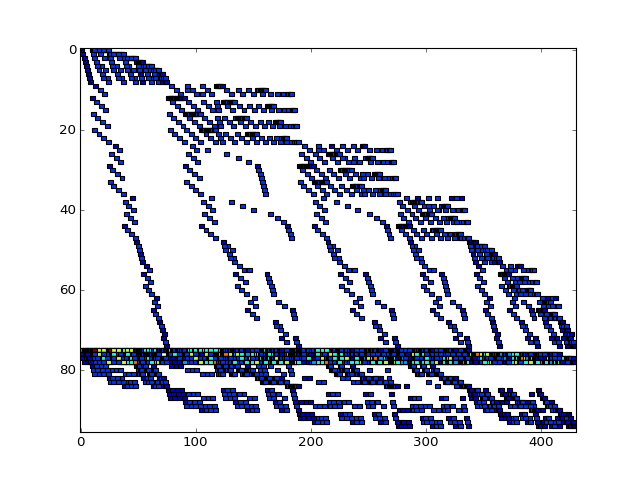

In [19]:
plot_matrix(contracted_A_hg)

In [18]:
fts.raw().toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

# Optimization Pipeline

1. Params ✓
1. Measurement Operators, States ✓
1. QuantumContext ✓
1. Probability Distribution ✓
1. Marginal Factorized Context Vector ✓
1. Row Sum Contraction ✓
1. Hypergraph Selection Contraction
1. Antecedent, Consequent Selection
1. Inequality Evaluation

In [72]:
import numpy as np
from quantum_tools.optimizers.minimizer import Minimizer
from quantum_tools.utilities import utils
from quantum_tools.config import *
from quantum_tools.contexts.measurement import Measurement
from quantum_tools.contexts.state import State
from quantum_tools.statistics.variable import RandomVariableCollection
from quantum_tools.inflation import marginal_equality
from quantum_tools.examples import symbolic_contexts
from quantum_tools.contexts.quantum_context import QuantumContext, QuantumProbDist, QuantumProbDistOptimized

class HardyOrbitMinimizer(Minimizer):

    def __init__(self):
        Minimizer.__init__(self, [32,32,32,16,16,16])
        self.local_log = True
        self.permutation = utils.get_triangle_permutation()
        self.random_variables = RandomVariableCollection.new(('A', 'B', 'C'), (4, 4, 4))
        self.preinjectable_sets = symbolic_contexts.ABC_444_444.preinjectable_sets
        self.orbit_contractor = row_sum
        self.antecedent = 0
        hg_rows, hg_cols = hyper_graph_contraction(contracted_A, self.antecedent, remove_ant=True)
        hg = hyper_graph(contracted_A, self.antecedent)
        fts = find_transversals(hg, strat=HTStrat('depth', max_t=10))
        self.transversal_indicies = fts.raw()[:, 0].indices # pick a particular transversal to optimize against
        self.hg_rows = hg_rows

    def initial_guess(self):
        initial_guess = np.random.normal(scale=10.0, size=self.mem_size)
        return initial_guess

    def get_context(self, param):
        pA, pB, pC, prhoAB, prhoBC, prhoAC = self.mem_slots
        A = Measurement.Strats.Param.pvms(param[pA])
        B = Measurement.Strats.Param.pvms(param[pB])
        C = Measurement.Strats.Param.pvms(param[pC])
        rhoAB = State.Strats.Param.dm(param[prhoAB])
        rhoBC = State.Strats.Param.dm(param[prhoBC])
        rhoAC = State.Strats.Param.dm(param[prhoAC])

        qc = QuantumContext(
            random_variables=self.random_variables,
            measurements=(A,B,C),
            states=(rhoAB,rhoBC,rhoAC),
            permutation=self.permutation,
        )
        return qc

    def objective(self, param):
        qc = self.get_context(param)
        pd = QuantumProbDistOptimized(qc)

        # target = pd._dev_slice((0,0,0))
        b = marginal_equality.contexts_marginals(pd, self.preinjectable_sets) # The marginals over the preinjectable sets
        orbit_sum = self.orbit_contractor.dot(b) # The new contracted marginals into orbits
        antecedent = orbit_sum[self.antecedent] # The lhs of the inequality
        marginals_hg_space = orbit_sum[self.hg_rows] # Same reduction made to get transveral
        consequents = marginals_hg_space[self.transversal_indicies] # The values of the particular consequents
        target = np.sum(consequents) - antecedent # This value *should* be positive if no hardy paradox
        self.log("Calculated objective", target)
        return target

In [74]:
hom = HardyOrbitMinimizer()
hom.minimize()
# PROFILE_MIXIN(hom.minimize)
# hom.save_results_to_file(OUTPUT_DIR + "HOM_temp.txt")

'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273471'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273577'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273724'
'Calculated objective, 0.372158273577'
'Calculated objective, 0.372158273578'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273487'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.37215827358'
'Calculated objective, 0.372158273574'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273667'
'Calculated objective, 0.372158273578'
'Calculated objective, 0.372158273577'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.372158273598'
'Calculated objective, 0.372158273578'
'Calculated objective, 0.372158273577'
'Calculated objective, 0.372158273576'
'Calculated objective, 0.3